In [190]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [191]:
from fastai.text import *

## Preparing the data

In [192]:
path = '/storage'
df = pd.read_csv('/storage/text_chunks.csv')

In [74]:
df.head()

,author,text_chunk
0,hawthorne,"of his wife's liability to sin, sorrow, decay,..."
1,hawthorne,Nature that had roused the admiration of all t...
2,hawthorne,will wither in a few moments and leave nothing...
3,hawthorne,Brazen Head. All these antique naturalists sto...
4,hawthorne,but it will be on the same principle that woul...


In [75]:
df.shape

(551, 2)

In [76]:
df['text_chunk'][1]

'Nature that had roused the admiration of all the learned societies in Europe. Seated calmly in this laboratory, the pale philosopher had investigated the secrets of the highest cloud region and of the profoundest mines; he had satisfied himself of the causes that kindled and kept alive the fires of the volcano; and had explained the mystery of fountains, and how it is that they gush forth, some so bright and pure, and others with such rich medicinal virtues, from the dark bosom of the earth. Here, too, at an earlier period, he had studied the wonders of the human frame, and attempted to fathom the very process by which Nature assimilates all her precious influences from earth and air, and from the spiritual world, to create and foster man, her masterpiece. The latter pursuit, however, Aylmer had long laid aside in unwilling recognition of the truth--against which all seekers sooner or later stumble--that our great creative Mother, while she amuses us with apparently working in the bro

In [81]:
data_lm = TextDataBunch.from_csv(path, 'text_chunks.csv', text_cols=1, label_cols=0, max_vocab=100000)

In [82]:
data_lm.save()

In [83]:
data = TextDataBunch.load(path)

### Tokenization

In [84]:
data = TextClasDataBunch.load(path)
data.show_batch()

text,target
"xxbos beautifully . ' ' xxmaj er - xxunk ! ' said xxmaj tegumai , looking up . ' xxmaj we 'll say _ xxunk xxmaj that means sky . ' xxmaj taffy drew the snake and the drying - pole . xxmaj then she stopped . ' xxmaj we must make a new picture for that end sound , must n't we ? ' ' _ xxmaj shu -",kipling
"xxbos of the hill you can see xxmaj all - the - xxmaj elephant - there - was , and xxmaj all - the - xxmaj cow - there - was , and xxmaj all - the - xxmaj turtle - there - was going off to play as the xxmaj eldest xxmaj magician told them . xxmaj the xxmaj cow has a hump , because she was xxmaj all",kipling
"xxbos pulled , and pulled , and at each pull the xxmaj elephant 's xxmaj child 's nose grew longer and longer -- and it hurt him xxunk ! xxmaj then the xxmaj elephant 's xxmaj child felt his legs slipping , and he said through his nose , which was now nearly five feet long , ' xxmaj this is too xxunk for be ! ' xxmaj then the",kipling
"xxbos the middle of a wait - a - bit thorn - bush , and he said , ' xxmaj my father has spanked me , and my mother has spanked me ; all my aunts and xxunk have spanked me for my ' satiable curtiosity ; and _ still _ i want to know what the xxmaj crocodile has for dinner ! ' xxmaj then xxmaj kolokolo xxmaj bird",kipling
"xxbos and xxunk are missing . xxmaj they were lost , a long time ago , in a great war , and the tribe mended the necklace with the dried xxunk of a xxunk , but no one ever found p and xxup xxunk xxmaj that is how the saying began , ' xxmaj you must mind your p 's . and xxunk 's . ' r is , of",kipling


### Numericalization


In [85]:
data.vocab.itos[:1000]

['xxunk',
 'xxpad',
 'xxbos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 ',',
 'the',
 '.',
 'and',
 'of',
 'to',
 'a',
 'i',
 'in',
 'he',
 'it',
 'that',
 'was',
 'his',
 "'",
 '“',
 '-',
 'with',
 'as',
 '”',
 'you',
 'had',
 'is',
 'for',
 ';',
 'not',
 'but',
 'her',
 'at',
 'my',
 'she',
 'said',
 'on',
 'be',
 'him',
 'have',
 'this',
 '!',
 'all',
 'by',
 'me',
 'they',
 'which',
 '?',
 'from',
 'one',
 'so',
 'there',
 '"',
 "'s",
 'were',
 '--',
 'would',
 'no',
 'out',
 'an',
 'what',
 'when',
 'then',
 'we',
 'or',
 'up',
 'do',
 '_',
 'if',
 'man',
 'are',
 'will',
 'been',
 'upon',
 '’s',
 'them',
 'into',
 'could',
 'their',
 'who',
 'now',
 'little',
 'some',
 'did',
 'about',
 'more',
 'very',
 'like',
 'time',
 'down',
 'your',
 'its',
 'has',
 'can',
 'other',
 'over',
 'before',
 'only',
 'came',
 "n't",
 'than',
 'see',
 'any',
 'old',
 ':',
 'how',
 'went',
 'such',
 'never',
 'well',
 'know',
 'day',
 'after',
 'should',
 'again',
 'come',
 'himself',
 'o

In [86]:
data.train_ds[0][0].data[:10]

array([  2,  13,  79,   8,  22,   4,   9, 210,  30,   9])

## Language model

In [87]:
bs=48

In [88]:
TextList.from_csv(path, 'text_chunks.csv', cols='text_chunk')

AttributeError: 'NoneType' object has no attribute 'textify'

In [92]:
data_lm = (TextList.from_csv('/storage', 'text_chunks.csv', cols='text_chunk')
           #Inputs: all the text files in path
#             .filter_by_folder(include=['train', 'test', 'unsup']) 
           #We may have other temp folders that contain text files so we only keep what's in train and test
            .random_split_by_pct(0.2)
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
data_lm.save('tmp_lm')

In [94]:
data_lm = TextLMDataBunch.load(path, 'tmp_lm', bs=bs)

In [95]:
data_lm.show_batch(100)

idx,text
0,"and without intending it , nay , in spite of a purpose to the contrary , reverted to this one disastrous topic . xxmaj trifling as it at first appeared , it so connected itself with innumerable trains of thought and modes of feeling that it became the central point of all . xxmaj with the morning twilight xxmaj aylmer opened his eyes upon his wife 's face and recognized"
1,"like the deepest tone of a mighty xxunk ; and with the final xxunk of that dreadful xxunk there came a sound , as if the roaring wind , the rushing streams , the howling beasts , and every other voice of the xxunk wilderness were mingling and according with the voice of guilty man in homage to the prince of all . xxmaj the four blazing pines threw up"
2,"by the hands of the renowned xxmaj xxunk xxmaj xxunk , and is well worthy to be a love gift to the fairest dame in xxmaj italy . xxmaj but its contents are xxunk . xxmaj one little xxunk of this antidote would have rendered the most xxunk poisons of the xxmaj xxunk xxunk . xxmaj doubt not that it will be as xxunk against those of xxmaj rappaccini ."
3,"your arm to this sturdy blacksmith , and deem yourself honored by the xxunk , though you behold him xxunk from the anvil . xxmaj all xxunk of human speech are like his mother tongue to this rare man . xxmaj xxunk let those take their places , of whatever rank they come , who possess the xxunk gifts to lead armies or to sway a people -- xxmaj nature"
4,", was so very fervent that it melted her with its own warmth as reflected from the hollow semblance of a lover . xxmaj no matter what xxmaj feathertop said , his words found depth and xxunk in her ear ; no matter what he did , his action was heroic to her eye . xxmaj and by this time it is to be supposed there was a blush on"
5,"awoke . xxmaj the first act of xxunk recollection was to make anxious inquiries respecting the condition of his wounded fellow - traveller . xxmaj the latter shook his head . "" xxmaj reuben , my boy , "" said he , "" this rock beneath which we sit will serve for an old hunter 's xxunk . xxmaj there is many and many a long mile of howling wilderness"
6,"xxmaj annie , "" murmured he ; "" i have deceived myself , and must suffer for it . i xxunk for xxbos and thought , and fancied , and dreamed that you might give it me ; but you lack the talisman , xxmaj annie , that should admit you into my secrets . xxmaj that touch has undone the toil of months and the thought of a lifetime"
7,"“ xxmaj but where is your little companion ? ” he said : “ the boy i put into the tree . ” xxmaj the xxmaj giant loved him the best because he had kissed him . “ xxmaj we do n’t know , ” answered the children ; “ he has gone away . ” “ xxmaj you must tell him to be sure and come here to -"
8,"face leant over the table and looked at my bundle . “ xxmaj orchids ? ” he asked . “ a few , ” i said . “ xxmaj xxunk ? ” he said . “ xxmaj chiefly , ” said xxup i. “ xxmaj anything new ?— i thought not . _ i _ did these islands twenty - five — twenty - seven years ago . xxmaj if"
9,"last moments . xxmaj she burnt no will , she says , although xxmaj plattner never accused her of doing so ; her husband made but one will , and that just after their marriage . xxmaj certainly , from a man who had never seen it , xxmaj plattner ’s account of the furniture of the room was curiously accurate . xxmaj one other thing , even at the"


In [96]:
# Get the learner
learn = language_model_learner(data_lm, pretrained_model=URLs.WT103_1, drop_mult=0.3)

In [97]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


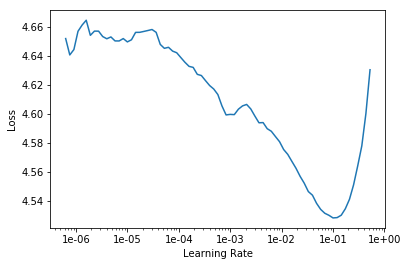

In [99]:
learn.recorder.plot(skip_end=15)

In [101]:
learn.fit_one_cycle(5, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,3.909238,3.894897,0.278184
2,3.831820,3.865620,0.279118
3,3.603801,3.840043,0.280482
4,3.390770,3.827016,0.284254
5,3.253905,3.824741,0.284254


In [102]:
learn.save('fit_head')

In [104]:
learn.load('fit_head');

In [105]:
# do some fine tuning


In [106]:
learn.unfreeze()

In [107]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,3.178855,3.842153,0.283859
2,3.153744,3.821389,0.286988
3,3.052854,3.816657,0.288857
4,2.903993,3.848372,0.287673
5,2.753365,3.870413,0.289480
6,2.609424,3.918938,0.286842
7,2.469490,3.951360,0.284891
8,2.350299,3.991229,0.284302
9,2.254661,4.011600,0.283250
10,2.223098,4.018437,0.283299


In [108]:
learn.save('fine_tuned')

In [ ]:
# Test out how good this fine tuning is ...

In [109]:
learn.load('fine_tuned');

In [110]:
TEXT = "It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness, it was the epoch of belief"
N_WORDS = 100
N_SENTENCES = 4

In [111]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness, it was the epoch of belief , and the end of the xxmaj universe . xxmaj it was five years since i was a little older than i , and now i had noticed it . xxmaj it is the only thing i can understand , but it is absolutely impossible to say . i remember myself trying to remember that when i was young , i had an xxbos a kind of brave new - comer . xxmaj by and by he found that the xxmaj captain ’s chronometers were of the same kind as the original he cut , and that he was trying
It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness, it was the epoch of belief , and it was a period of silence and insignificance . xxmaj it was not until afterwards that the story of the xxmaj death ’s xxmaj head xxmaj mills began to haunt us . xxmaj the days after the death of xxmaj master xxmaj gookin were still daily and nightly , and the story o

In [112]:
learn.save_encoder('fine_tuned_enc')

## Classifier


In [193]:
path = '/storage'

In [150]:
data_clas = (TextList.from_csv('/storage', 'text_chunks.csv', cols='text_chunk', vocab=data_lm.vocab)
             #grab all the text files in path
            .random_split_by_pct(0.2)
             .label_from_df(cols="author")
             #label them all with their folders
             .databunch(bs=bs))


data_clas.save('tmp_clas')

In [152]:
# data_clas

In [153]:
# data_lm

In [154]:
data_clas = TextClasDataBunch.load(path, 'tmp_clas', bs=bs)

In [155]:
data_clas.show_batch(20)

text,target
"xxbos beautifully . ' ' xxmaj er - xxunk ! ' said xxmaj tegumai , looking up . ' xxmaj we 'll say _ xxunk xxmaj that means sky . ' xxmaj taffy drew the snake and the drying - pole . xxmaj then she stopped . ' xxmaj we must make a new picture for that end sound , must n't we ? ' ' _ xxmaj shu -",kipling
"xxbos jumped out from behind a tree and said "" xxmaj ah ! "" ' ' xxmaj now , make another noise , ' said xxmaj taffy , very proud . ' xxmaj xxunk ! ' said her xxmaj daddy , very loud . ' xxmaj h'm , ' said xxmaj taffy . ' xxmaj that 's a xxunk noise . xxmaj the end part is _ xxunk - fish",kipling
"xxbos of the hill you can see xxmaj all - the - xxmaj elephant - there - was , and xxmaj all - the - xxmaj cow - there - was , and xxmaj all - the - xxmaj turtle - there - was going off to play as the xxmaj eldest xxmaj magician told them . xxmaj the xxmaj cow has a hump , because she was xxmaj all",kipling
"xxbos pulled , and pulled , and at each pull the xxmaj elephant 's xxmaj child 's nose grew longer and longer -- and it hurt him xxunk ! xxmaj then the xxmaj elephant 's xxmaj child felt his legs slipping , and he said through his nose , which was now nearly five feet long , ' xxmaj this is too xxunk for be ! ' xxmaj then the",kipling
"xxbos the middle of a wait - a - bit thorn - bush , and he said , ' xxmaj my father has spanked me , and my mother has spanked me ; all my aunts and xxunk have spanked me for my ' satiable curtiosity ; and _ still _ i want to know what the xxmaj crocodile has for dinner ! ' xxmaj then xxmaj xxunk xxmaj bird",kipling
"xxbos and q are missing . xxmaj they were lost , a long time ago , in a great war , and the tribe mended the necklace with the dried xxunk of a xxunk , but no one ever found p and xxup xxunk xxmaj that is how the saying began , ' xxmaj you must mind your p 's . and q 's . ' r is , of",kipling
"xxbos xxmaj xxunk , xxmaj xxunk , xxmaj xxunk - men , xxmaj xxunk , and the rest , who decided that before they xxunk the xxmaj stranger - man 's head off he should instantly lead them down to the river and show them where he had hidden poor xxmaj taffy . xxmaj by this time the xxmaj stranger - man ( in spite of being a xxmaj tewara",kipling
"xxbos he wore very few clothes , and he could n't read and he could n't write and he did n't want to , and except when he was hungry he was quite happy . xxmaj his name was xxmaj tegumai xxmaj bopsulai , and that means , ' xxmaj man - who - does - not - put - his - foot - forward - in - a -",kipling
"xxbos persuade the sex to speak gently into a telephone : xxmaj yes ? xxmaj why , how did _ that _ happen ? xxmaj pause . xxmaj what did you say ? xxmaj pause . xxmaj oh no , i do n't think it was . xxmaj pause . _ xxmaj no _ ! xxmaj oh no , i did n't mean _ xxunk i meant , put it",twain
"xxbos am a xxmaj head xxmaj chief , but it 's very bad for the rest of the xxmaj tribe of xxmaj tegumai , and , as you can see , it surprises the stranger . ' xxmaj then they adopted the xxmaj stranger - man ( a genuine xxmaj tewara of xxmaj xxunk ) into the xxmaj tribe of xxmaj tegumai , because he was a gentleman and did",kipling


We can then create a model to classify those reviews and load the encoder we saved before.

In [202]:
learn = text_classifier_learner(data_clas, drop_mult=0.5)

In [159]:
learn.load_encoder('fine_tuned_enc')
learn.freeze()

In [160]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


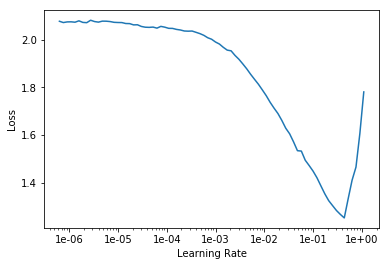

In [161]:
learn.recorder.plot()

In [165]:
learn.fit_one_cycle(3, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.394531,0.583566,0.781818
2,0.340726,0.165720,0.936364
3,0.266042,0.087945,0.963636


In [166]:
learn.save('first')

In [167]:
learn.load('first');

In [168]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.195300,0.163914,0.945455


In [169]:
learn.save('second')

In [170]:
learn.load('second');

In [171]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.115032,0.132845,0.945455


In [172]:
learn.save('third')

In [203]:
learn.load('third');

In [206]:
# can't get this to work
# learn.unfreeze()
# learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

In [220]:
learn.predict("Heaven knows we need never be ashamed of our tears, for they are rain upon the blinding dust of earth, overlying our hard hearts.")

(Category hawthorne,
 tensor(2),
 tensor([1.9507e-04, 6.5436e-02, 5.4323e-01, 1.8597e-02, 1.3787e-02, 3.5733e-02,
         3.1201e-01, 1.1014e-02]))

In [221]:
learn.export("whitetext-export.pkl")